# Dự đoán Doanh số (Sales Prediction) với Linear Regression

## Mục tiêu
Xây dựng mô hình Linear Regression để dự đoán doanh số (Sales) dựa trên ngân sách quảng cáo trên 3 kênh: TV, Radio, và Newspaper.

## Dataset
- **TV**: Ngân sách quảng cáo trên TV (nghìn USD)
- **Radio**: Ngân sách quảng cáo trên Radio (nghìn USD)
- **Newspaper**: Ngân sách quảng cáo trên Newspaper (nghìn USD)
- **Sales**: Doanh số bán hàng (nghìn đơn vị) - Biến mục tiêu

## 1. Import các thư viện cần thiết

In [382]:
# Import thư viện xử lý dữ liệu
import pandas as pd
import numpy as np

# Import thư viện trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns

# Import các công cụ từ scikit-learn
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cài đặt hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Tắt cảnh báo
import warnings
warnings.filterwarnings('ignore')


### 2. Tiền xử lý dữ liệu (Data Preprocessing)

In [383]:
# Load dữ liệu từ file CSV
df = pd.read_csv("Advertising.csv", index_col=0)

print("=" * 60)
print("THÔNG TIN DATASET")
print("=" * 60)
print(f"Số lượng mẫu: {df.shape[0]}")
print(f"Số lượng features: {df.shape[1]}")
print("\n5 dòng đầu tiên:")
df.head()

THÔNG TIN DATASET
Số lượng mẫu: 200
Số lượng features: 4

5 dòng đầu tiên:


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [384]:
# Kiểm tra thông tin chi tiết về dataset
print("THÔNG TIN CHI TIẾT")
print("=" * 60)
df.info()

THÔNG TIN CHI TIẾT
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [385]:
# Kiểm tra giá trị null (missing values)
print("=" * 60)
print("KIỂM TRA GIÁ TRỊ NULL")
print("=" * 60)
null_counts = df.isnull().sum()
print(null_counts)
print(f"\nTổng số giá trị null: {null_counts.sum()}")

if null_counts.sum() == 0:
    print("\nDữ liệu không có giá trị null!")
else:
    print("\nDữ liệu có giá trị null, cần xử lý!")

KIỂM TRA GIÁ TRỊ NULL
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Tổng số giá trị null: 0

Dữ liệu không có giá trị null!


In [386]:
# Thống kê mô tả (Descriptive Statistics)
print("=" * 60)
print("THỐNG KÊ MÔ TẢ")
print("=" * 60)
df.describe().round(2)

THỐNG KÊ MÔ TẢ


,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


## 3. Phân tích dữ liệu

### 3.1. Phân phối dữ liệu - Histogram

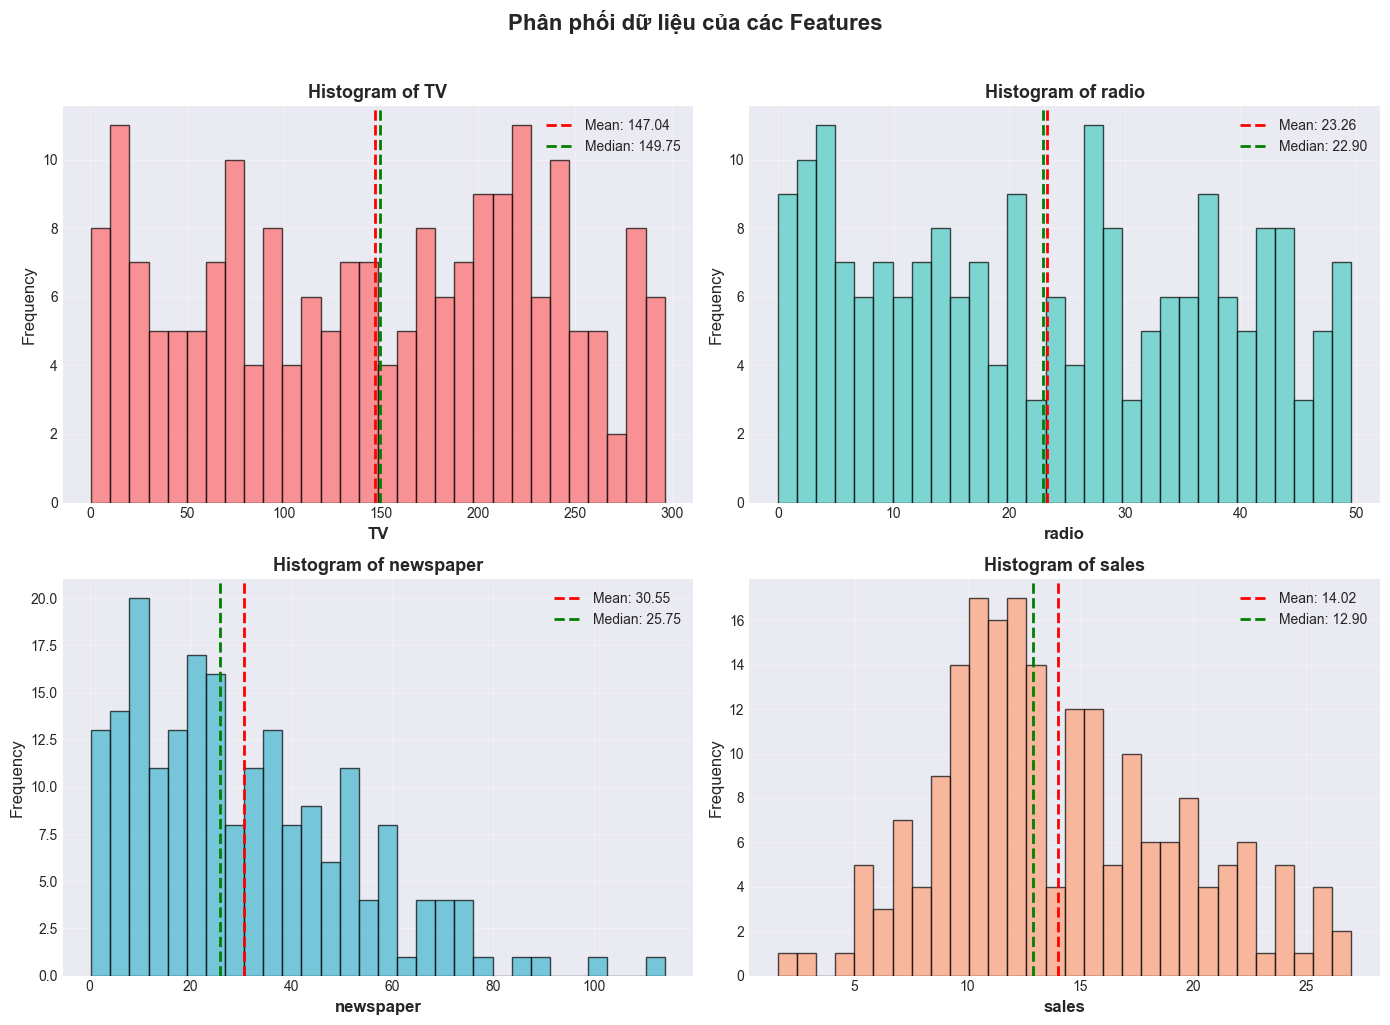

Histogram cho thấy phân phối của từng biến


In [387]:
# Vẽ histogram cho từng feature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Phân phối dữ liệu của các Features', fontsize=16, fontweight='bold', y=1.02)

# Danh sách các cột cần vẽ (sử dụng tên cột chính xác từ CSV)
columns = ['TV', 'radio', 'newspaper', 'sales']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for i, (col, color) in enumerate(zip(columns, colors)):
    row = i // 2
    col_idx = i % 2
    
    # Vẽ histogram
    axes[row, col_idx].hist(df[col], bins=30, color=color, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_xlabel(col, fontsize=12, fontweight='bold')
    axes[row, col_idx].set_ylabel('Frequency', fontsize=12)
    axes[row, col_idx].set_title(f'Histogram of {col}', fontsize=13, fontweight='bold')
    axes[row, col_idx].grid(alpha=0.3)
    
    # Thêm thông tin thống kê
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row, col_idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.show()

print("Histogram cho thấy phân phối của từng biến")

### 3.2. Phát hiện Outliers - Boxplot

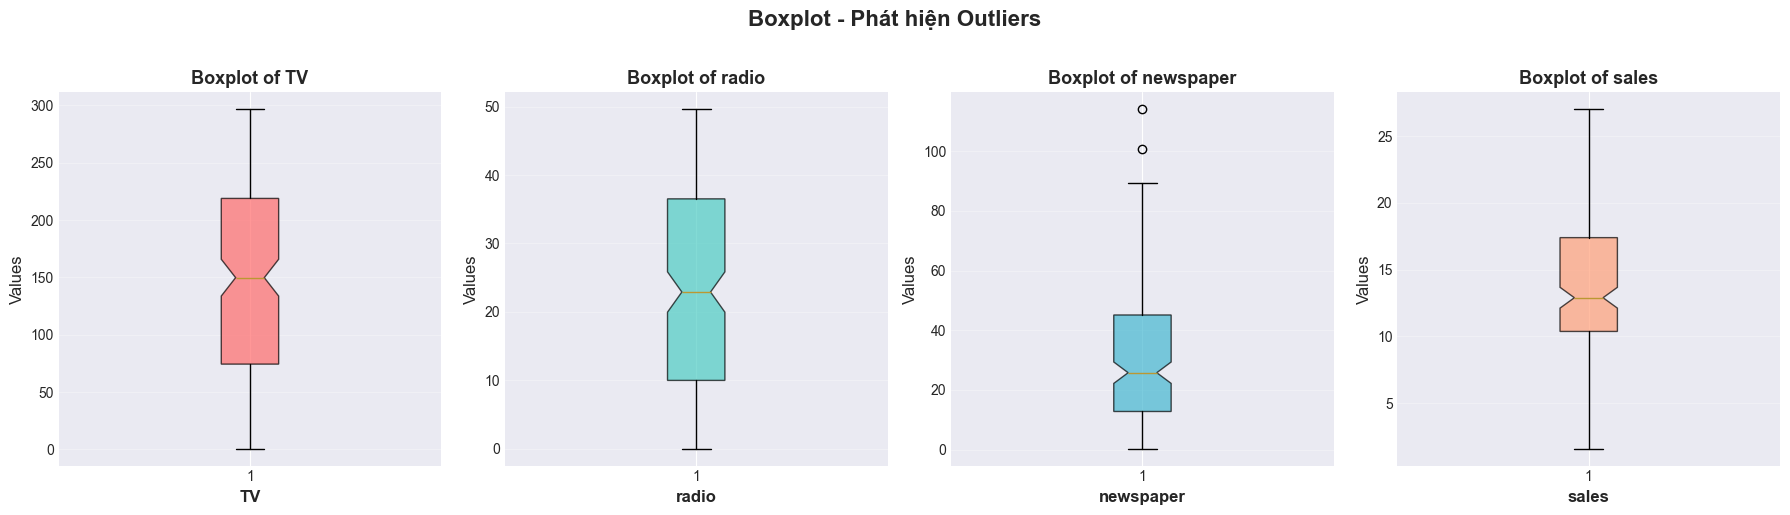

In [388]:
# Vẽ boxplot cho từng feature
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
fig.suptitle('Boxplot - Phát hiện Outliers', fontsize=16, fontweight='bold', y=1.02)

columns = ['TV', 'radio', 'newspaper', 'sales']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for i, (col, color) in enumerate(zip(columns, colors)):
    # Vẽ boxplot
    bp = axes[i].boxplot(df[col], patch_artist=True, notch=True, vert=True)
    
    # Tùy chỉnh màu sắc
    bp['boxes'][0].set_facecolor(color)
    bp['boxes'][0].set_alpha(0.7)
    
    axes[i].set_ylabel('Values', fontsize=12)
    axes[i].set_xlabel(col, fontsize=12, fontweight='bold')
    axes[i].set_title(f'Boxplot of {col}', fontsize=13, fontweight='bold')
    axes[i].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


### 3.3. Mối quan hệ giữa các biến - Pairplot

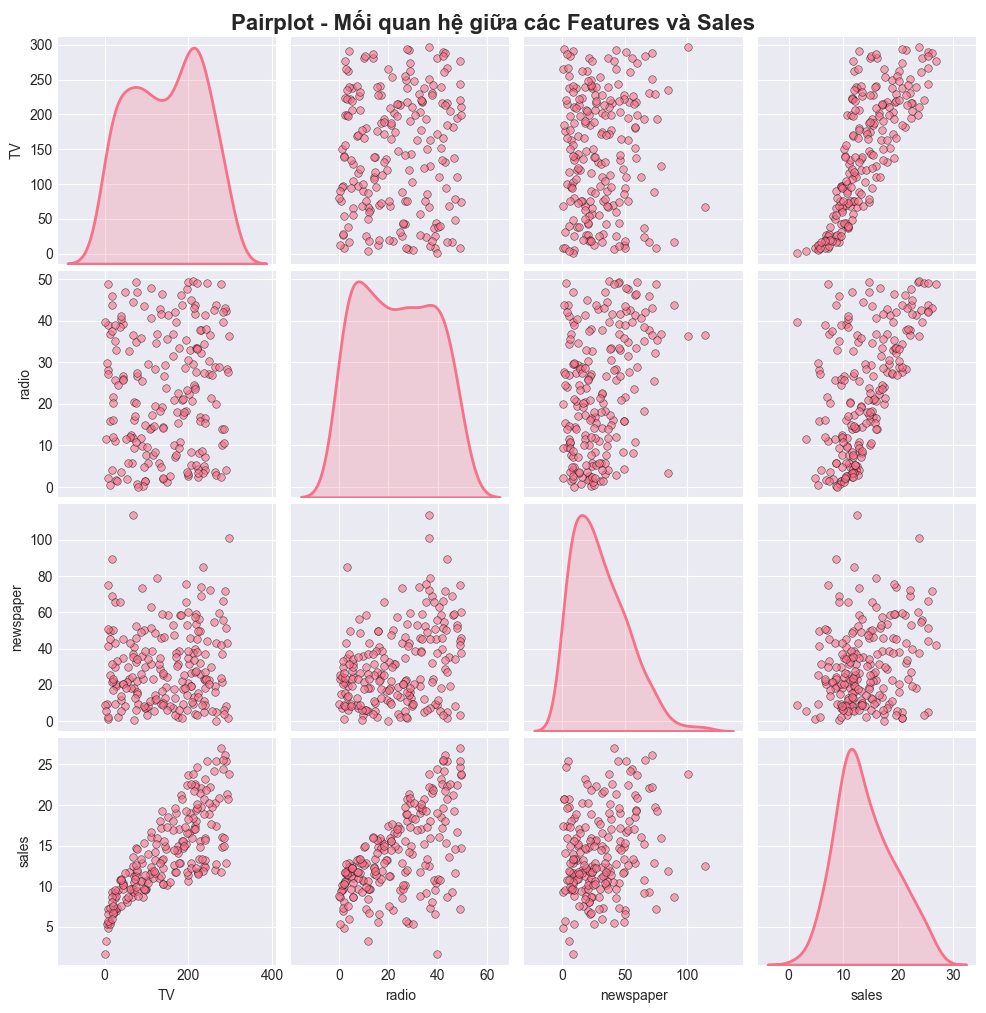


 Pairplot cho thấy:
  - Mối quan hệ tuyến tính giữa các features với Sales
  - TV và Radio có mối tương quan mạnh với Sales
  - Phân phối của từng biến (trên đường chéo)


In [389]:
# Vẽ pairplot để xem mối liên hệ giữa các biến

# Tạo pairplot với Sales được highlight
pairplot = sns.pairplot(df, 
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'},
                        diag_kws={'shade': True, 'linewidth': 2})

pairplot.fig.suptitle('Pairplot - Mối quan hệ giữa các Features và Sales', 
                      fontsize=16, fontweight='bold', y=1.01)

plt.show()

print("\n Pairplot cho thấy:")
print("  - Mối quan hệ tuyến tính giữa các features với Sales")
print("  - TV và Radio có mối tương quan mạnh với Sales")
print("  - Phân phối của từng biến (trên đường chéo)")

### 3.4. Ma trận tương quan - Heatmap

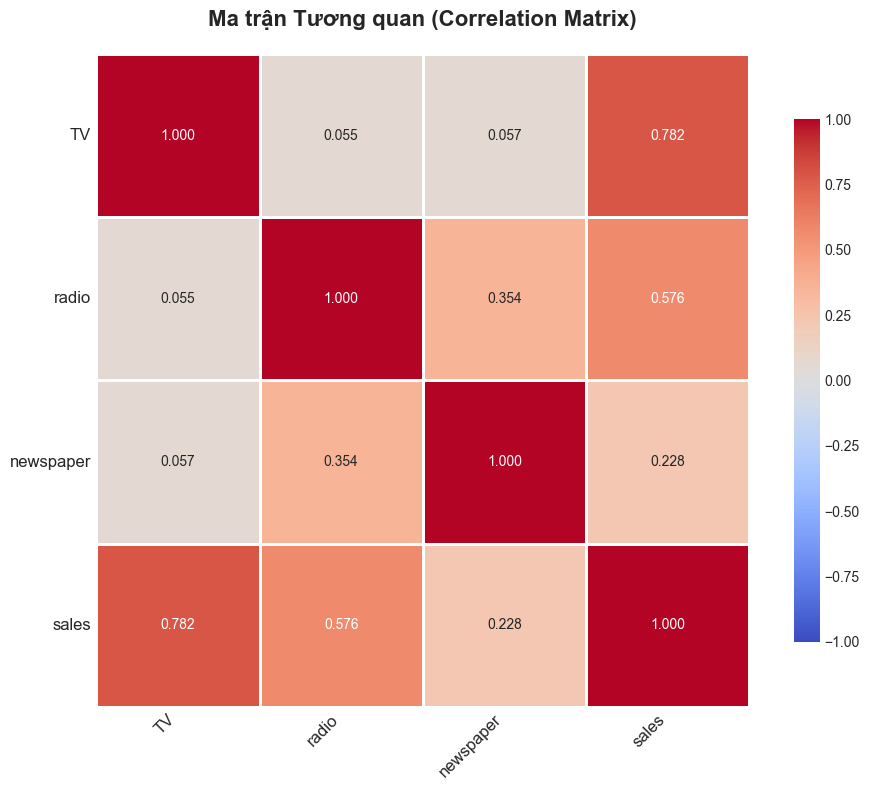

MỨC ĐỘ TƯƠNG QUAN VỚI SALES
TV             :  0.782
radio          :  0.576
newspaper      :  0.228


In [390]:
# Tính ma trận tương quan
correlation_matrix = df.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # Hiển thị giá trị số
            fmt='.3f',            # Format 3 chữ số thập phân
            cmap='coolwarm',      # Bảng màu
            center=0,             # Căn giữa tại 0
            square=True,          # Ô vuông
            linewidths=2,         # Độ dày đường kẻ
            cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)      # Giới hạn giá trị

plt.title('Ma trận Tương quan (Correlation Matrix)', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

# In ra mức độ tương quan với sales
print("MỨC ĐỘ TƯƠNG QUAN VỚI SALES")
sales_corr = correlation_matrix['sales'].sort_values(ascending=False)
for feature, corr in sales_corr.items():
    if feature != 'sales':
        print(f"{feature:15s}: {corr:6.3f}")


## 4. Xây dựng Mô hình Linear Regression

### 4.1. Chuẩn bị dữ liệu với chuẩn hóa (Standardization)

In [391]:
# Import thư viện cần thiết
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chuẩn bị dữ liệu
X = df[['TV', 'radio', 'newspaper']].values.astype(float)  # Features (ma trận m x n)
y = df['sales'].values.reshape(-1, 1).astype(float)         # Target (vector m x 1)

# Chia dữ liệu Train/Test (80/20)
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Chuẩn hóa features
# StandardScaler: (x - mean) / std → Mean ≈ 0, Std ≈ 1
scaler_X = StandardScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

# Chuẩn hóa target (sales) - giúp thuật toán hội tụ nhanh hơn
scaler_y = StandardScaler()
y_train_normalized = scaler_y.fit_transform(y_train)
y_test_normalized = scaler_y.transform(y_test)

print("=" * 70)
print("CHUẨN BỊ DỮ LIỆU CHO GRADIENT DESCENT")
print("=" * 70)
print(f"Training samples:   {X_train.shape[0]}")
print(f"Test samples:       {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"\nData Shapes:")
print(f"   X_train_normalized: {X_train_normalized.shape}")
print(f"   y_train_normalized: {y_train_normalized.shape}")
print(f"   X_test_normalized:  {X_test_normalized.shape}")
print(f"   y_test_normalized:  {y_test_normalized.shape}")
print(f"\nDữ liệu đã được chuẩn hóa (Standardized)")
print(f"Mean ≈ 0, Std ≈ 1 cho tất cả features")
print("=" * 70)

CHUẨN BỊ DỮ LIỆU CHO GRADIENT DESCENT
Training samples:   160
Test samples:       40
Number of features: 3

Data Shapes:
   X_train_normalized: (160, 3)
   y_train_normalized: (160, 1)
   X_test_normalized:  (40, 3)
   y_test_normalized:  (40, 1)

Dữ liệu đã được chuẩn hóa (Standardized)
Mean ≈ 0, Std ≈ 1 cho tất cả features


### 4.2. Định nghĩa các hàm cốt lõi cho Linear Regression

**Công thức Linear Regression:**
$$\hat{y} = X \cdot w + b$$

Trong đó:
- $\hat{y}$: giá trị dự đoán
- $X$: ma trận features (m samples × n features)
- $w$: vector weights (n × 1)
- $b$: bias (scalar)

**Loss Function (MSE):**
$$L = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2$$

**Gradient Descent Update:**
- $w := w - \alpha \cdot \frac{\partial L}{\partial w}$
- $b := b - \alpha \cdot \frac{\partial L}{\partial b}$

In [392]:
def predict(X, w, b):

    return X.dot(w) + b


def compute_loss(y_true, y_pred):
 
    m = y_true.shape[0]
    return np.sum((y_pred - y_true) ** 2) / (2 * m)


def compute_gradient(X, y_true, y_pred):
   
    m = X.shape[0]
    error = y_pred - y_true
    
    dw = X.T.dot(error) / m  # (n × m) * (m × 1) = (n × 1)
    db = np.sum(error) / m    # scalar
    
    return dw, db


def update_params(w, b, dw, db, learning_rate):

    w_new = w - learning_rate * dw
    b_new = b - learning_rate * db
    
    return w_new, b_new


def gradient_descent(X_train, y_train, X_test, y_test, 
                     learning_rate=0.01, epochs=10000, print_every=1000):
    # Khởi tạo parameters
    n_features = X_train.shape[1]
    w = np.zeros((n_features, 1))  # Khởi tạo weights = 0
    b = 0.0                         # Khởi tạo bias = 0
    
    train_losses = []
    test_losses = []
    
    print(f"{'='*70}")
    print(f"BẮT ĐẦU HUẤN LUYỆN VỚI GRADIENT DESCENT")
    print(f"{'='*70}")
    print(f"Learning rate:     {learning_rate}")
    print(f"Epochs:            {epochs}")
    print(f"Features:          {n_features}")
    print(f"Training samples:  {X_train.shape[0]}")
    print(f"{'='*70}")
    
    for epoch in range(epochs):
        # 1. Forward pass - tính dự đoán
        y_train_pred = predict(X_train, w, b)
        
        # 2. Tính loss
        train_loss = compute_loss(y_train, y_train_pred)
        train_losses.append(train_loss)
        
        # 3. Tính gradients
        dw, db = compute_gradient(X_train, y_train, y_train_pred)
        
        # 4. Cập nhật parameters
        w, b = update_params(w, b, dw, db, learning_rate)
        
        # In kết quả định kỳ
        if epoch % print_every == 0:
            y_test_pred = predict(X_test, w, b)
            test_loss = compute_loss(y_test, y_test_pred)
            test_losses.append(test_loss)
            
            print(f"Epoch {epoch:6d} | Train Loss: {train_loss:.6f} | Test Loss: {test_loss:.6f}")
    
    # Đánh giá cuối cùng
    y_test_pred = predict(X_test, w, b)
    test_loss = compute_loss(y_test, y_test_pred)
    test_losses.append(test_loss)
    
    print(f"{'='*70}")
    print(f"HOÀN THÀNH HUẤN LUYỆN!")
    print(f"{'='*70}")
    print(f"Final Train Loss: {train_losses[-1]:.6f}")
    print(f"Final Test Loss:  {test_loss:.6f}")
    print(f"{'='*70}")
    
    return w, b, train_losses, test_losses


### 4.3. Huấn luyện Mô hình

In [393]:
# Huấn luyện mô hình với Gradient Descent
w_trained, b_trained, train_losses_history, test_losses_history = gradient_descent(
    X_train_normalized, y_train_normalized,
    X_test_normalized, y_test_normalized,
    learning_rate=0.1,  # Tốc độ học
    epochs=5000,        # Số epochs
    print_every=500     # In kết quả mỗi 500 epochs
)

print("\n" + "=" * 70)
print("PARAMETERS ĐÃ HỌC:")
print("=" * 70)
print(f"Weights (w):")
features_names = ['TV', 'radio', 'newspaper']
for i, feature in enumerate(features_names):
    print(f"  w[{i}] ({feature:10s}): {w_trained[i][0]:8.4f}")
print(f"\nBias (b): {b_trained:.4f}")
print("=" * 70)


BẮT ĐẦU HUẤN LUYỆN VỚI GRADIENT DESCENT
Learning rate:     0.1
Epochs:            5000
Features:          3
Training samples:  160
Epoch      0 | Train Loss: 0.500000 | Test Loss: 0.500337
Epoch    500 | Train Loss: 0.052150 | Test Loss: 0.061190
Epoch   1000 | Train Loss: 0.052150 | Test Loss: 0.061190
Epoch   1500 | Train Loss: 0.052150 | Test Loss: 0.061190
Epoch   2000 | Train Loss: 0.052150 | Test Loss: 0.061190
Epoch   2500 | Train Loss: 0.052150 | Test Loss: 0.061190
Epoch   3000 | Train Loss: 0.052150 | Test Loss: 0.061190
Epoch   3500 | Train Loss: 0.052150 | Test Loss: 0.061190
Epoch   4000 | Train Loss: 0.052150 | Test Loss: 0.061190
Epoch   4500 | Train Loss: 0.052150 | Test Loss: 0.061190
HOÀN THÀNH HUẤN LUYỆN!
Final Train Loss: 0.052150
Final Test Loss:  0.061190

PARAMETERS ĐÃ HỌC:
Weights (w):
  w[0] (TV        ):   0.7391
  w[1] (radio     ):   0.5483
  w[2] (newspaper ):   0.0110

Bias (b): -0.0000


### 4.4. Đánh giá Mô hình và Visualization

ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TRAIN VÀ TEST

 Training Set (n=160):
   R² Score:  0.8957 (89.57% variance explained)
   MAE:       1.1985
   RMSE:      1.6447

 Test Set (n=40):
   R² Score:  0.8994 (89.94% variance explained)
   MAE:       1.4608
   RMSE:      1.7816

 R² trên Test set: 89.94% variance được giải thích
 Chênh lệch Train-Test R²: 0.0037 → Không overfitting


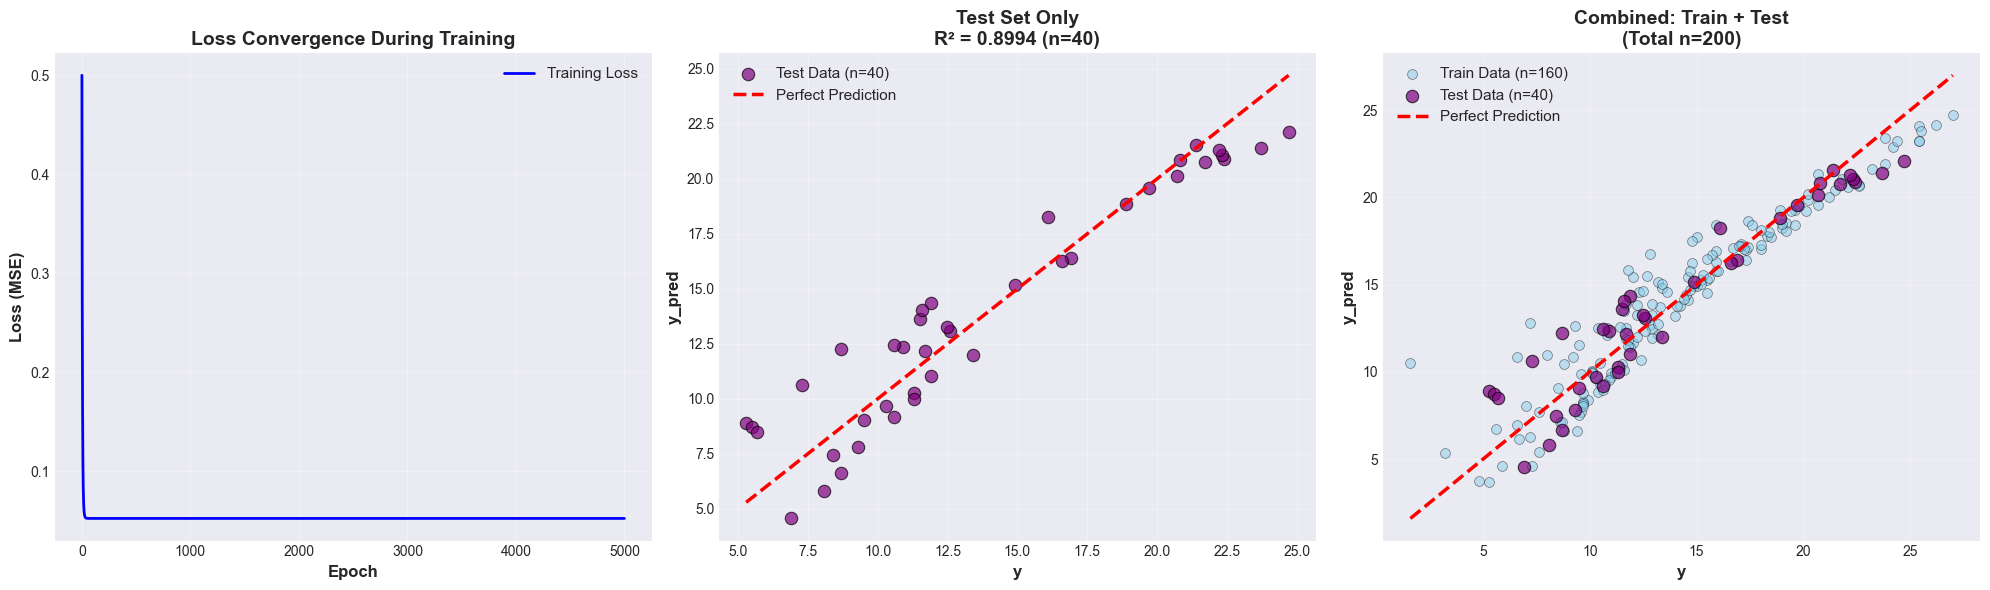

In [397]:
# Import thêm metrics từ sklearn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Dự đoán trên tập Train và Test (dữ liệu đã chuẩn hóa)
y_train_pred_normalized = predict(X_train_normalized, w_trained, b_trained)
y_test_pred_normalized = predict(X_test_normalized, w_trained, b_trained)

# Inverse transform về scale gốc để đánh giá
y_train_pred = scaler_y.inverse_transform(y_train_pred_normalized).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_pred_normalized).flatten()
y_train_original = scaler_y.inverse_transform(y_train_normalized).flatten()
y_test_original = scaler_y.inverse_transform(y_test_normalized).flatten()

# Tính các metrics
r2_train = r2_score(y_train_original, y_train_pred)
r2_test = r2_score(y_test_original, y_test_pred)
mae_train = mean_absolute_error(y_train_original, y_train_pred)
mae_test = mean_absolute_error(y_test_original, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train_original, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test_original, y_test_pred))

print("=" * 70)
print("ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TRAIN VÀ TEST")
print("=" * 70)
print(f"\n Training Set (n={len(y_train_original)}):")
print(f"   R² Score:  {r2_train:.4f} ({r2_train*100:.2f}% variance explained)")
print(f"   MAE:       {mae_train:.4f}")
print(f"   RMSE:      {rmse_train:.4f}")

print(f"\n Test Set (n={len(y_test_original)}):")
print(f"   R² Score:  {r2_test:.4f} ({r2_test*100:.2f}% variance explained)")
print(f"   MAE:       {mae_test:.4f}")
print(f"   RMSE:      {rmse_test:.4f}")

print(f"\n R² trên Test set: {r2_test:.2%} variance được giải thích")
print(f" Chênh lệch Train-Test R²: {abs(r2_train - r2_test):.4f} → ", end="")
if abs(r2_train - r2_test) < 0.05:
    print("Không overfitting")
else:
    print("Có dấu hiệu overfitting")
print("=" * 70)

# Vẽ biểu đồ Loss Curve và Actual vs Predicted (CẢ TRAIN VÀ TEST)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Loss Convergence
axes[0].plot(train_losses_history, label='Training Loss', linewidth=2, color='blue')
axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
axes[0].set_title('Loss Convergence During Training', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted - Test Set ONLY (Để so sánh)
axes[1].scatter(y_test_original, y_test_pred, alpha=0.7, s=80,
                edgecolors='k', linewidth=0.8, label=f'Test Data (n={len(y_test_original)})', color='purple')
axes[1].plot([y_test_original.min(), y_test_original.max()],
             [y_test_original.min(), y_test_original.max()],
             'r--', linewidth=2.5, label='Perfect Prediction')
axes[1].set_xlabel('y', fontsize=12, fontweight='bold')
axes[1].set_ylabel('y_pred', fontsize=12, fontweight='bold')
axes[1].set_title(f'Test Set Only\nR² = {r2_test:.4f} (n={len(y_test_original)})', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# Plot 3: Actual vs Predicted - COMBINED (Train + Test)
axes[2].scatter(y_train_original, y_train_pred, alpha=0.5, s=50,
                edgecolors='k', linewidth=0.5, label=f'Train Data (n={len(y_train_original)})', color='skyblue')
axes[2].scatter(y_test_original, y_test_pred, alpha=0.7, s=80,
                edgecolors='k', linewidth=0.8, label=f'Test Data (n={len(y_test_original)})', color='purple')
axes[2].plot([min(y_train_original.min(), y_test_original.min()), 
              max(y_train_original.max(), y_test_original.max())],
             [min(y_train_original.min(), y_test_original.min()), 
              max(y_train_original.max(), y_test_original.max())],
             'r--', linewidth=2.5, label='Perfect Prediction')
axes[2].set_xlabel('y', fontsize=12, fontweight='bold')
axes[2].set_ylabel('y_pred', fontsize=12, fontweight='bold')
axes[2].set_title(f'Combined: Train + Test\n(Total n={len(y_train_original)+len(y_test_original)})', 
                  fontsize=14, fontweight='bold')
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 4.5. Phân tích Prediction theo từng Feature

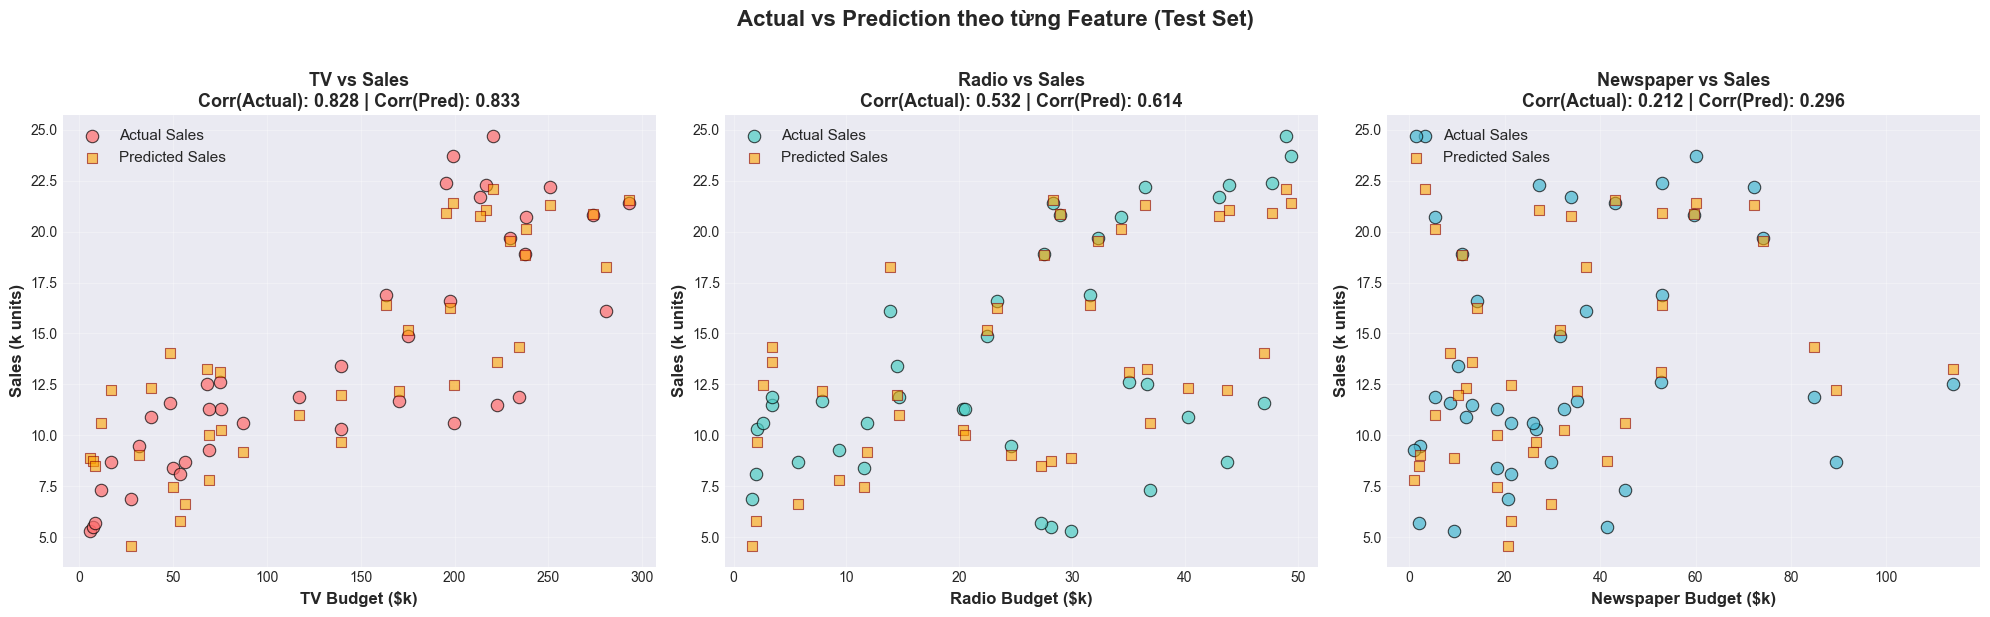

PHÂN TÍCH MỐI QUAN Hệ FEATURE - SALES

TV        :
  Correlation (Actual):     0.828
  Correlation (Predicted):  0.833
  Difference:               0.005

Radio     :
  Correlation (Actual):     0.532
  Correlation (Predicted):  0.614
  Difference:               0.082

Newspaper :
  Correlation (Actual):     0.212
  Correlation (Predicted):  0.296
  Difference:               0.083


In [395]:
# Phân tích mối quan hệ giữa từng feature với Sales (Actual vs Prediction)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Actual vs Prediction theo từng Feature (Test Set)', fontsize=16, fontweight='bold', y=1.02)

features_names = ['TV', 'Radio', 'Newspaper']
colors_features = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (feature, color) in enumerate(zip(features_names, colors_features)):
    # Scatter plot cho giá trị thực tế
    axes[i].scatter(X_test[:, i], y_test_original, 
                   alpha=0.7, s=80, edgecolors='k', linewidth=0.8,
                   label='Actual Sales', color=color, marker='o')
    
    # Scatter plot cho giá trị dự đoán
    axes[i].scatter(X_test[:, i], y_test_pred, 
                   alpha=0.6, s=60, edgecolors='darkred', linewidth=0.8,
                   label='Predicted Sales', color='orange', marker='s')
    
    # Tính correlation
    corr_actual = np.corrcoef(X_test[:, i], y_test_original)[0, 1]
    corr_pred = np.corrcoef(X_test[:, i], y_test_pred)[0, 1]
    
    axes[i].set_xlabel(f'{feature} Budget ($k)', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Sales (k units)', fontsize=12, fontweight='bold')
    axes[i].set_title(f'{feature} vs Sales\nCorr(Actual): {corr_actual:.3f} | Corr(Pred): {corr_pred:.3f}', 
                     fontsize=13, fontweight='bold')
    axes[i].legend(fontsize=11, loc='upper left')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 70)
print("PHÂN TÍCH MỐI QUAN Hệ FEATURE - SALES")
print("=" * 70)
for i, feature in enumerate(features_names):
    corr_actual = np.corrcoef(X_test[:, i], y_test_original)[0, 1]
    corr_pred = np.corrcoef(X_test[:, i], y_test_pred)[0, 1]
    diff = abs(corr_actual - corr_pred)
    print(f"\n{feature:10s}:")
    print(f"  Correlation (Actual):    {corr_actual:6.3f}")
    print(f"  Correlation (Predicted): {corr_pred:6.3f}")
    print(f"  Difference:              {diff:6.3f}", end="\n")
print("=" * 70)

-------------------------- Testing Set Metrics --------------------------
R2-Score on Testing set  ---> 0.899438
Mean Squared Error (MSE) on Testing set   ---> 3.174097
Root Mean Squared Error (RMSE) on Testing set ---> 1.781600

-------------------------- Residual Plots --------------------------


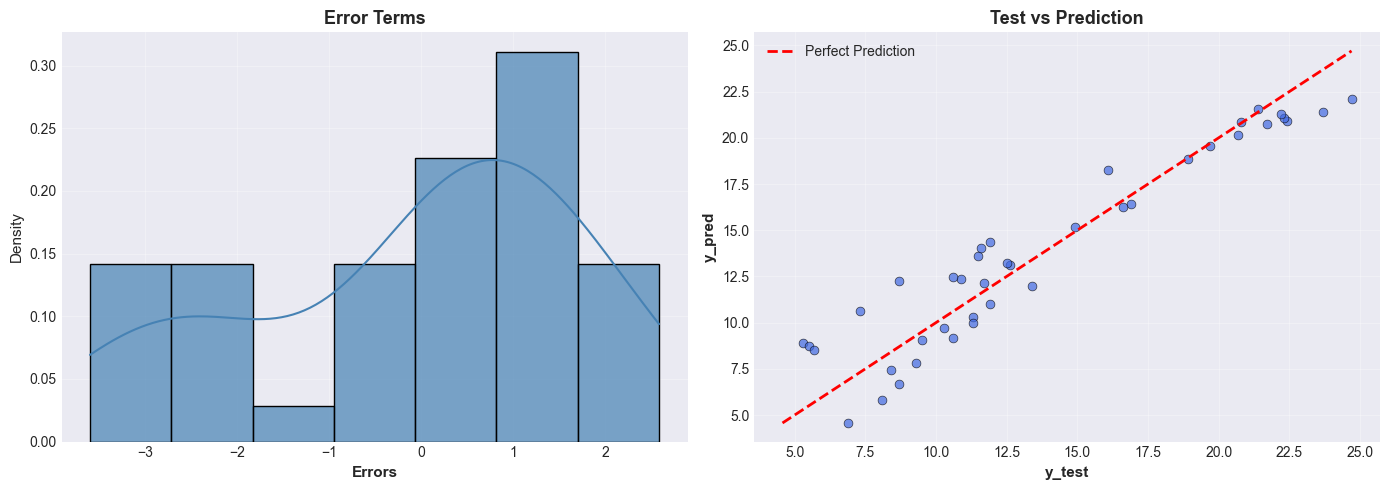

In [396]:
# 4.6.1 Residuals Distribution & Test vs Prediction (Test Set)
from sklearn.metrics import mean_squared_error

print("-" * 26 + " Testing Set Metrics " + "-" * 26)
mse_test = mean_squared_error(y_test_original, y_test_pred)
rmse_test = np.sqrt(mse_test)
print(f"R2-Score on Testing set  ---> {r2_test:.6f}")
print(f"Mean Squared Error (MSE) on Testing set   ---> {mse_test:.6f}")
print(f"Root Mean Squared Error (RMSE) on Testing set ---> {rmse_test:.6f}")
print("\n" + "-" * 26 + " Residual Plots " + "-" * 26)

# Residuals: y_true - y_pred
residuals = y_test_original - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ trái: Error Terms (Residuals Distribution Plot)
sns.histplot(residuals, kde=True, ax=axes[0], color="steelblue", edgecolor="black", alpha=0.7, stat="density")
axes[0].set_title("Error Terms", fontsize=13, fontweight="bold")
axes[0].set_xlabel("Errors", fontsize=11, fontweight="bold")
axes[0].set_ylabel("Density", fontsize=11)
axes[0].grid(True, alpha=0.3)

# Biểu đồ phải: Test vs Prediction (Predicted vs Actual Plot)
axes[1].scatter(y_test_original, y_test_pred, alpha=0.7, s=40, color="royalblue", edgecolors="k", linewidth=0.5)
min_val = min(y_test_original.min(), y_test_pred.min())
max_val = max(y_test_original.max(), y_test_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2, label="Perfect Prediction")
axes[1].set_title("Test vs Prediction", fontsize=13, fontweight="bold")
axes[1].set_xlabel("y_test", fontsize=11, fontweight="bold")
axes[1].set_ylabel("y_pred", fontsize=11, fontweight="bold")
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()